In [1]:
import os

current_directory = os.getcwd()
project_directory = os.path.abspath(os.path.join(current_directory, os.pardir, os.pardir))
os.chdir(project_directory)

In [2]:
import numpy as np
import pandas as pd
from src.features.resnet152 import get_resnet152_features
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.decomposition import PCA

/home/seara/Desktop/Github/sneakers-ml/src/features/resnet152.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
features, classes, class_to_idx = get_resnet152_features("data/merged/images/by-brands", save=True)

  0%|          | 0/93 [00:00<?, ?it/s]

In [4]:
features

array([[0.10434867, 0.        , 0.        , ..., 0.12713727, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00062081, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.01402425, 0.0286404 ,
        0.01709553],
       [0.        , 0.02579604, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01302566, 0.        , 0.00686717, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
classes


array([['data/merged/images/by-brands/adidas/0.jpeg', '0'],
       ['data/merged/images/by-brands/adidas/1.jpeg', '0'],
       ['data/merged/images/by-brands/adidas/10.jpeg', '0'],
       ...,
       ['data/merged/images/by-brands/y 3/7.jpeg', '29'],
       ['data/merged/images/by-brands/y 3/8.jpeg', '29'],
       ['data/merged/images/by-brands/y 3/9.jpeg', '29']], dtype='<U57')

In [6]:
similarity_matrix = cosine_similarity(features)

In [9]:
threshold = 0.99
paths = list(classes[:,0])

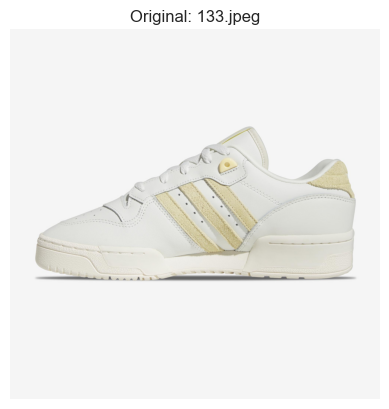

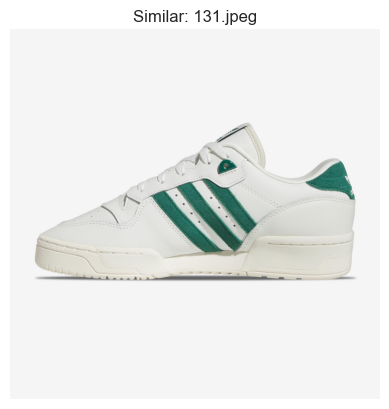

Deleted: 131.jpeg


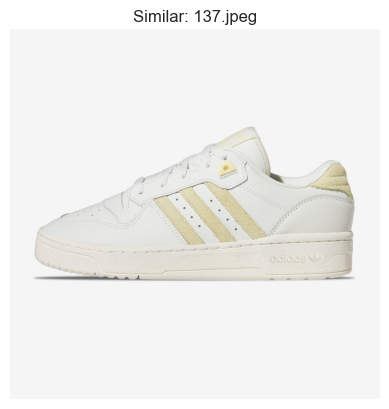

Deleted: 137.jpeg


In [8]:
import matplotlib.pyplot as plt
from PIL import Image
for i in range(len(paths)):
    # Find indices of images similar to the current image
    similar_indices = np.where(similarity_matrix[i] > threshold)[0]

    if len(similar_indices) > 2:  # At least one similar image (including itself)

        # Display the current image
        current_image_path = paths[i]
        current_image = Image.open(current_image_path)
        plt.imshow(current_image)
        plt.title(f"Original: {os.path.basename(current_image_path)}")
        plt.axis('off')
        plt.show()

        # Display and remove similar images
        for idx in similar_indices:
            if idx != i:
                similar_image_path = paths[idx]
                similar_image = Image.open(similar_image_path)

                plt.imshow(similar_image)
                plt.title(f"Similar: {os.path.basename(similar_image_path)}")
                plt.axis('off')
                plt.show()

                # Delete the similar image (you can replace this with your own logic)
                # os.remove(similar_image_path)
                print(f"Deleted: {os.path.basename(similar_image_path)}")
        break